In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
from thinkdsp import decorate

In [3]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [8]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

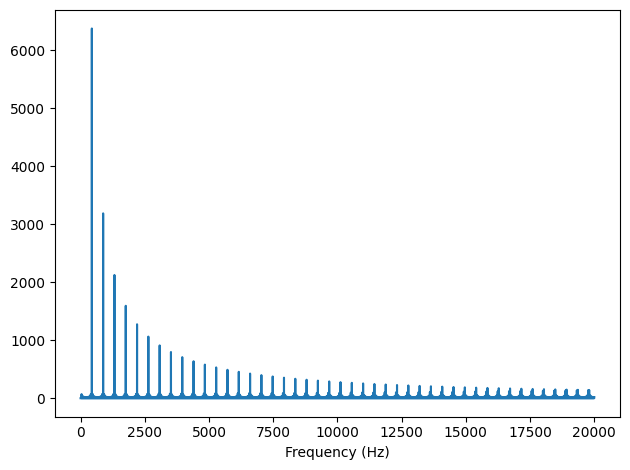

In [9]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

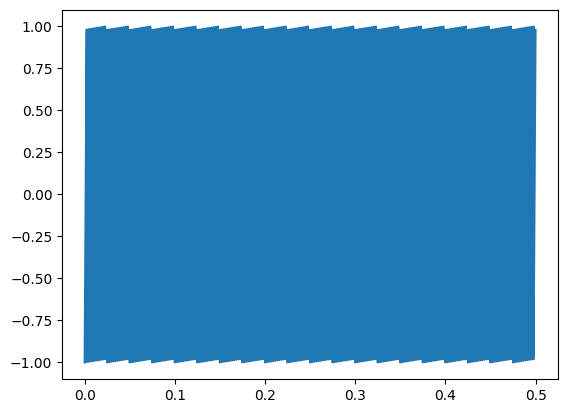

In [10]:
sawtooth.plot()

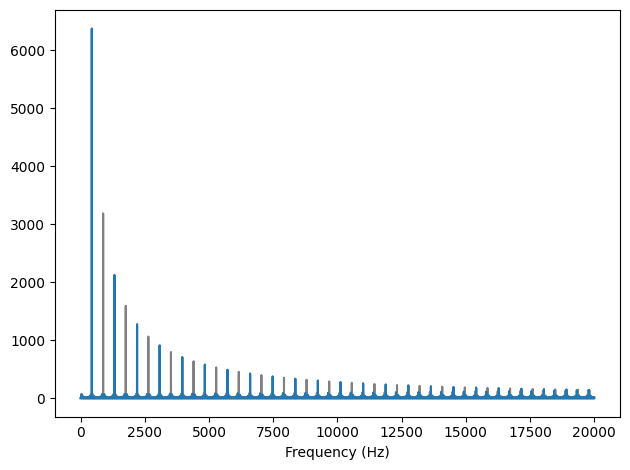

In [27]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

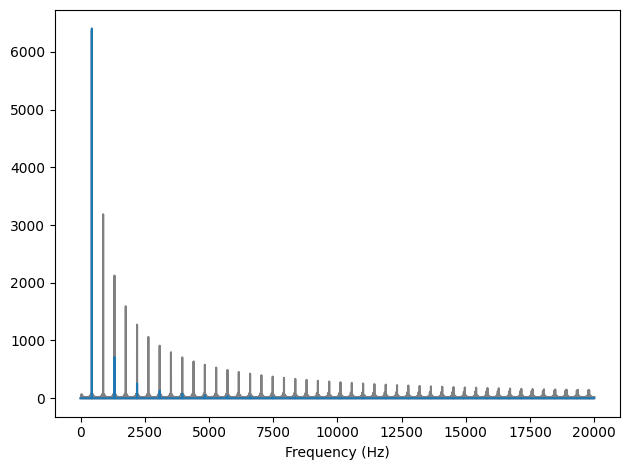

In [28]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

In [29]:
square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

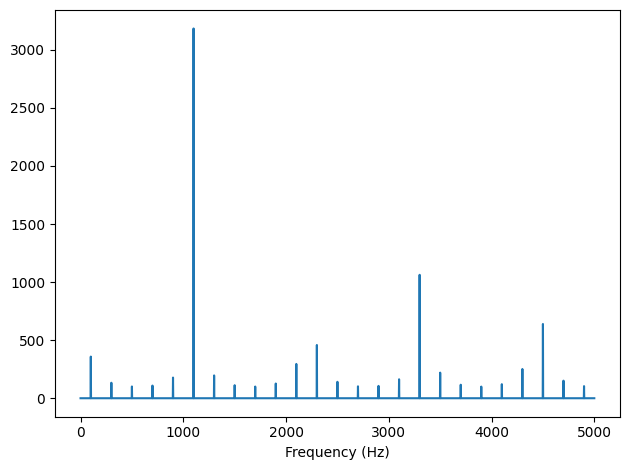

In [30]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

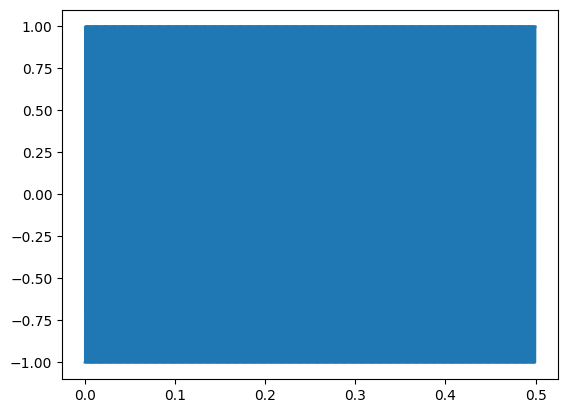

In [31]:
square.plot()

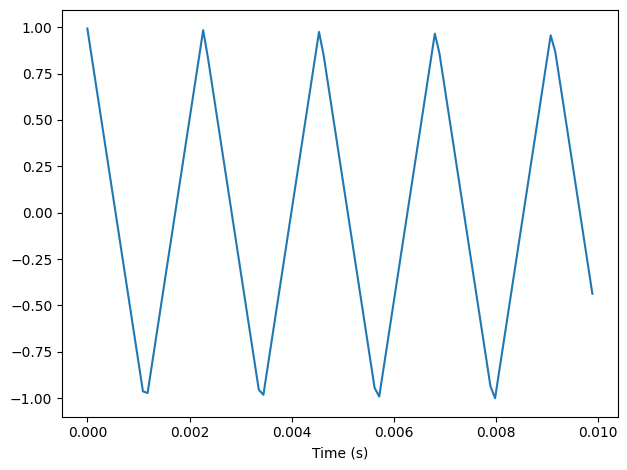

In [47]:
triangle = TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

In [48]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

np.complex128(1.0436096431476471e-14+0j)

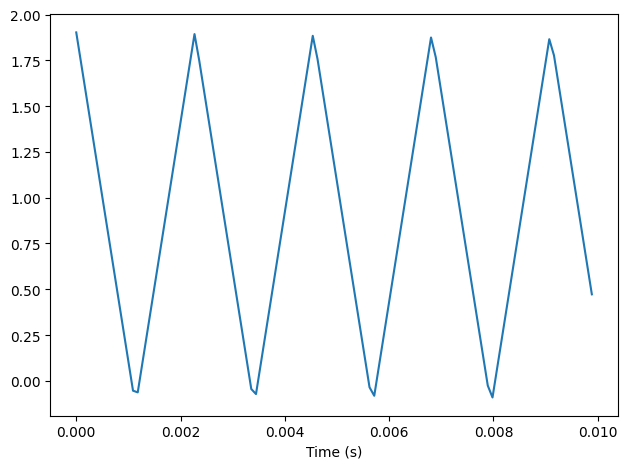

In [49]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

In [223]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [224]:
freq = 1100
signal = SquareSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.make_audio()

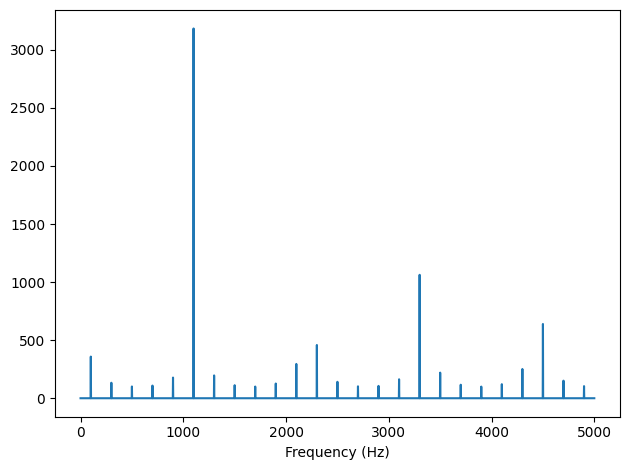

In [225]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

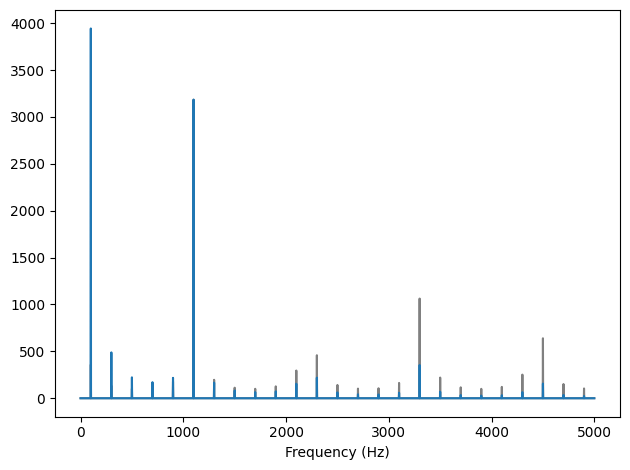

In [226]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [227]:
wave = spectrum.make_wave()
wave.make_audio()

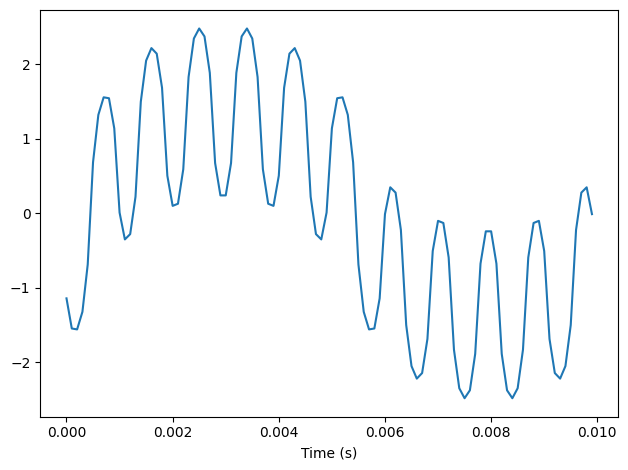

In [228]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')